In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score, accuracy_score,precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve

In [3]:
df = pd.read_csv(r"C:\Users\sahil\OneDrive\Python Self\EDA\Telecom_Customer_Churn\Preprocessed_Telecom_data.csv")

In [4]:
df.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,...,1,1,1,65.6,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,...,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,...,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,...,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,...,0,1,1,83.9,267.40,0.00,0,22.14,289.54,0


In [6]:
x = df.drop('Customer Status', axis=1)
y = df['Customer Status']

In [7]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


In [10]:
# outlier removal
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(x_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
x_train = x_train.drop(x_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)


# the function is empty means 
# it will take the default argumrnts 
# with out hyperparameter tuning

DecisionTreeClassifier()

In [13]:
DT.get_params() # to get all hyperparameter of models

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [14]:
# prediction
y_prediction = DT.predict(x_test)

In [16]:
# model evalutation
print(y_test.values[:20])
print(y_prediction[:20])

[0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0]
[1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0]


In [19]:
DT_accurecy = accuracy_score(y_test,y_prediction)
DT_accurecy

0.7394002068252327

In [20]:
confusion_matrix(y_test,y_prediction)

array([[201, 127],
       [125, 514]], dtype=int64)

In [21]:
confusion_matrix(y_test,y_prediction).ravel()
# TN, FP, FN, TP

array([201, 127, 125, 514], dtype=int64)

In [22]:
TN, FP, FN, TP = confusion_matrix(y_test,y_prediction).ravel()

In [24]:
# Precision TP/(TP+FP)
precision = TP/(TP+FP)
precision

0.8018720748829953

In [25]:
# recall TP/(TP+FN)
recall = TP / (TP+FN)
recall

0.8043818466353677

In [26]:
# F1 Score (2*precision * recall)/ (precision+recall)
F1Score = (2*precision*recall) / (precision+recall)
F1Score

0.803125

In [29]:
acc= accuracy_score(y_test,y_prediction)
pre = precision_score(y_test,y_prediction)
recl = recall_score(y_test,y_prediction)
f1scor = f1_score(y_test,y_prediction)
print(acc)
print(pre)
print(recl)
print(f1scor)

0.7394002068252327
0.8018720748829953
0.8043818466353677
0.803125


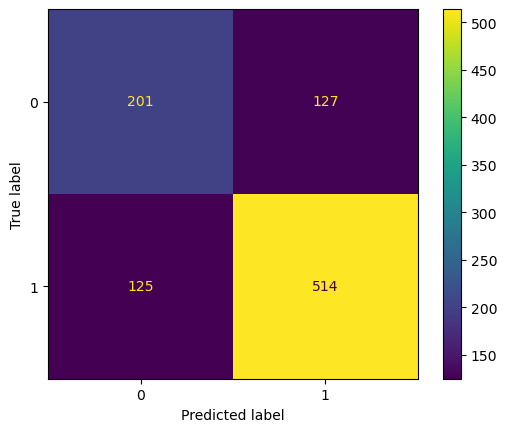

In [31]:
cmt = confusion_matrix(y_test,y_prediction)
ConfusionMatrixDisplay(cmt).plot()
plt.grid(False)

In [32]:
DT.predict_proba(x_test)
# NO   YES
# [0    1] == max : 1  === yes : 1
# [1    0] == max : 1 ==== no :  0
# [0    1] == max : 1  === yes : 1

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [33]:
y_predict_probability = DT.predict_proba(x_test)

roc auc curve  calculated on probability of prediction 

roc-auc curve : FPR vs TPR
y_predict_probability 

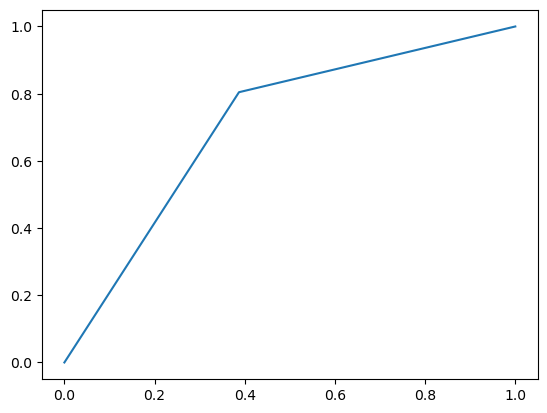

In [35]:
fpr, tpr, thershold = roc_curve(y_test,y_predict_probability[:,1])
plt.plot(fpr,tpr)